# Genetic algorihtms

A genetic algorithm is a class of adaptive stochastic optimization algorithms involving search and optimization. Genetic algorithms were first used by Holland (1975).

The basic idea is to try to mimic a simple picture of natural selection in order to find a good algorithm. The first step is to mutate, or randomly vary, a given collection of sample individuals (solutions). The second step is a selection step, which is often done through measuring against a fitness function. The process is repeated until a suitable solution is found.

There are a large number of different types of genetic algorithms. The step involving mutation depends on how the sample programs are represented, as well as whether the programmer includes various crossover techniques. The test for fitness is also up to the programmer.

Holland created an electronic organism as a binary string ("chromosome"), and then used genetic and evolutionary principles of fitness-proportionate selection for reproduction (including random crossover and mutation) to search enormous solution spaces efficiently.

### Pseudocode:

![](https://i0.wp.com/fernandojimenezmotte.com/wp-content/uploads/2018/03/GA1.jpg?zoom=1.5&resize=358%2C278)

```text

Variables
  pop_size: population size
  ind_size: individual length
  mut_prob: mutation probability
  generations: number of generations to be evolved

Start with a populuation of size pop_size

FOR gi=1:generations
  Evaluate fitness for each individual in the population. 
  Transform the fitness evaluation into a probability to be chosen.
  FOR ii=1:pop_size/2
    Select parents: pairs of individuals according to their probability
    Cross the two selected Parents to get two Childs
    Mutate the two generated Childs
  ENDFOR
  Overwrite the population of Parents with the Childs
ENDFOR

Notes: 
  - A population is a collection of individuals.
  - An individual (chromosome) is a collection of genes

```

### Individuals (chromosome coding)

![](https://i2.wp.com/fernandojimenezmotte.com/wp-content/uploads/2018/03/GA2.png?w=556)

### Genetic operators

- Selection

![](https://communities.bentley.com/resized-image/__size/550x0/__key/CommunityServer-Wikis-Components-Files/00-00-00-00-10/7762.Fig2.png)

- Crossover

![](https://communities.bentley.com/resized-image/__size/550x0/__key/CommunityServer-Wikis-Components-Files/00-00-00-00-10/1616.Fig3.png)

- Mutation

![](https://communities.bentley.com/resized-image/__size/550x0/__key/CommunityServer-Wikis-Components-Files/00-00-00-00-10/7367.Fig4.png)

Resources:

- https://improperprior.com/post/2020/05/20/formula-1-and-genetic-algorithms-p1/
- https://natureofcode.com/book/chapter-9-the-evolution-of-code/
- **(Also take a look at)** https://anaconda.org/marsgr6/genetic_algorithm/notebook

## Find the optimum (maximum) of the following function

$$f(x) = -(sin(x-10) + 0.05\times(x-10)^2) + 10, \text{ subject to the constraint that } 0 \leq x \leq 20$$

- Research the Gradient descent method: https://medium.com/analytics-vidhya/if-we-have-any-function-and-we-want-find-the-extremum-of-that-function-whether-it-is-minima-or-3dd53d89ea40

- Below is a brute force method (or grid search)

(array([8.57244857]), 10.88786282657364, 1999999)

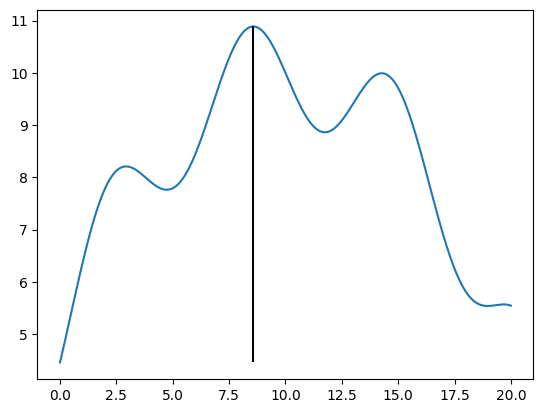

In [1]:
# Do imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Code here
a, b = 0, 20
epsilon = 0.00001  # This the error we want to allow
x = np.linspace(a, b, int((b-a)/epsilon))
def f(x): return -(np.sin(x-10) + 0.05*(x-10)**2) + 10
y = f(x)
plt.plot(x, y)
len(x)
l = np.where(y == y.max())
max_x, max_y = x[l], y.max()
plt.vlines(max_x, y.min(), max_y, 'k')
max_x, max_y, len(x)

- Individuals' coding
  - The individuals are binary with a given lenghth $l$.
  - We must transform the binary vector to a numeric vector, between 0 and a maximum $2^l-1$.
  - We may need to scale the individuals between the minimun and maximum values in $x$.
    - Min-max normalization:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/73032b45bffd5e5140483fbe1ed49bf174f1962d)

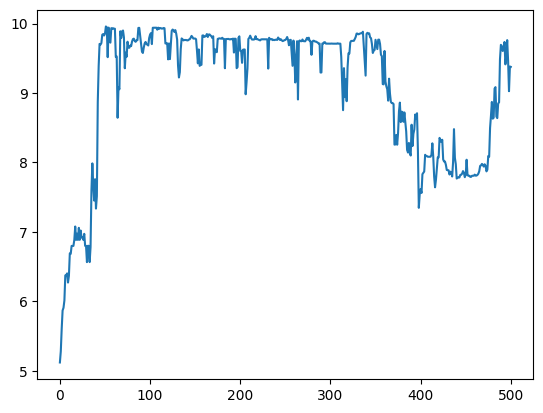

In [2]:
individual_size = 16  # individuals size
pop_size = 10  # number of individuals
generations = 500
mutation_probability = 0.005

def min_max_normalization(x, min_x, max_x, a, b):
    # Reescale between a and b
    return a + ((x-min_x)*(b-a)) / (max_x - min_x)

# fitness function
def f(x): return -(np.sin(x-10) + 0.05*(x-10)**2) + 10

def change_gene(gene, p_mut):
    gene = int(gene)
    if np.random.random() < p_mut:
        gene ^= 1

    return str(gene)

def mutate(individual, p_mut=0):
    return ''.join(change_gene(c, p_mut) for c in individual)


a, b = 0, 20
min_value = int('0'*16, 2)
max_value = int('1'*16, 2)

# Generate initial population
population = bernoulli.rvs(p=0.1, size=(pop_size, individual_size))
pop_str = [''.join(ind.astype('str')) for ind in population]
pop_dec = np.array([int(ind, 2) for ind in pop_str])
pop_norm = min_max_normalization(pop_dec, min_value, max_value, a, b)

f_mean = [f(pop_norm.mean())]  # mean of the individuals, fitnees of pop

x = []

for gi in range(generations):
    pop_fitness = f(pop_norm)
    pop_probability = pop_fitness / pop_fitness.sum()

    # generate childs
    new_pop = []
    for i in range(pop_size//2):
        parents = np.random.choice(pop_str, p=pop_probability, size=2)
        cross_point = np.random.randint(individual_size)
        child1 = parents[0][:cross_point] + parents[1][cross_point:]
        child2 = parents[1][:cross_point] + parents[0][cross_point:]
        new_pop += [child1, child2]
    pop_str = [mutate(individual, mutation_probability) 
    for individual in new_pop]
    pop_dec = np.array([int(ind, 2) for ind in pop_str])
    pop_norm = min_max_normalization(pop_dec, min_value, max_value, a, b)
    # best individual of population
    x += [pop_norm[np.where(pop_norm == pop_norm.max())[0][0]]] 
    
    f_mean += [f(pop_norm).mean()]

plt.plot(f_mean)


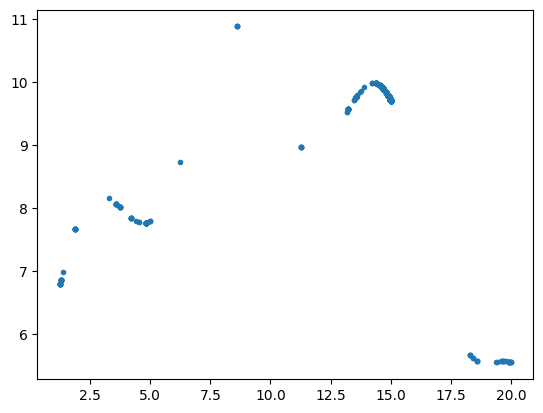

In [3]:
plt.plot(x, f(np.array(x)), '.')

### TO DO

- Draw (in a graphic) the best solutions in X. 
- Draw individual solutions in time (generation 0, 10, 100, 200, 500)
- Return best X, where f(X) is maximum (this is the solution to the problem).

In [9]:
walk =  [0, 11, 0, 13, 33, 29]
walk_s = set(walk)

for i in list(walk_s):
    for j in list(walk_s):
        if i != j:
            print(i, j)

0 33
0 11
0 13
0 29
33 0
33 11
33 13
33 29
11 0
11 33
11 13
11 29
13 0
13 33
13 11
13 29
29 0
29 33
29 11
29 13


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>